<a href="https://colab.research.google.com/github/SergioDLezama/Retail-Analysis/blob/testing/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
!git clone https://github.com/SergioDLezama/Retail-Analysis

fatal: destination path 'Retail-Analysis' already exists and is not an empty directory.


In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
pip install scikit-learn-extra

In [181]:
import matplotlib.pylab as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing clustering algorithms
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture

from sklearn_extra.cluster import KMedoids

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

# Silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans

import warnings
warnings.filterwarnings("ignore")

In [182]:
pd.set_option('display.max_columns', None)

In [183]:
sns.set_style("whitegrid")

In [184]:
sns.set_palette('Blues_r')

In [185]:
df = pd.read_csv('/content/Retail-Analysis/retail_data.csv')

In [186]:
data = df.copy()

In [187]:
df.head(3)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment


In [188]:
df.shape

(302010, 30)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

## Data treatment

In [190]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [191]:
df = df.dropna()

In [192]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

In [193]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.head(3)


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment


In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,293911.00,5493725.59,2596085.94,1000007.00,3245885.50,5495879.00,7738197.00,9999995.00
Customer_ID,293911.00,55013.40,26009.44,10000.00,32470.00,55027.00,77514.00,99999.00
Phone,293911.00,5500607077.13,2596111174.73,1000049414.00,3253497020.00,5504466161.00,7749761285.50,9999996122.00
Zipcode,293911.00,50288.38,28976.61,501.00,25408.00,50586.00,75252.00,99949.00
Age,293911.00,35.47,15.02,18.00,22.00,32.00,46.00,70.00
Year,293911.00,2023.17,0.37,2023.00,2023.00,2023.00,2023.00,2024.00
Total_Purchases,293911.00,5.36,2.87,1.00,3.00,5.00,8.00,10.00
Amount,293911.00,255.15,141.39,10.00,132.84,255.46,377.64,500.00
Total_Amount,293911.00,1367.69,1128.90,10.00,438.85,1041.16,2028.95,4999.63
Ratings,293911.00,3.16,1.32,1.00,2.00,3.00,4.00,5.00


In [195]:
dup = df.duplicated()
df[dup].index


Index([299759, 301362, 301486], dtype='int64')

In [196]:
df.drop(df.index[dup])

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.00,37249.00,Michelle Harrington,Ebony39@gmail.com,1414786801.00,3959 Amanda Burgs,Dortmund,Berlin,77985.00,Germany,21.00,Male,Low,Regular,9/18/2023,2023.00,September,22:03:55,3.00,108.03,324.09,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.00,Cycling shorts
1,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab
2,6679610.00,30192.00,Scott Jensen,Shane85@gmail.com,8362160449.00,4133 Young Canyon,Geelong,New South Wales,75929.00,Australia,48.00,Male,Low,Regular,4/26/2023,2023.00,April,4:06:29,3.00,354.48,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00,Sports equipment
3,7232460.00,62101.00,Joseph Miller,Mary34@gmail.com,2776751724.00,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.00,Canada,56.00,Male,High,Premium,05-08-23,2023.00,May,14:55:17,7.00,352.41,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.00,Utility knife
4,4983775.00,27901.00,Debra Coleman,Charles30@gmail.com,9098267635.00,5813 Lori Ports Suite 269,Bristol,England,48704.00,UK,22.00,Male,Low,Premium,01-10-24,2024.00,January,16:54:07,2.00,124.28,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.00,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.00,12104.00,Meagan Ellis,Courtney60@gmail.com,7466353743.00,389 Todd Path Apt. 159,Townsville,New South Wales,4567.00,Australia,31.00,Male,Medium,Regular,1/20/2024,2024.00,January,23:40:29,5.00,194.79,973.96,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.00,Historical fiction
302006,1197603.00,69772.00,Mathew Beck,Jennifer71@gmail.com,5754304957.00,52809 Mark Forges,Hanover,Berlin,16852.00,Germany,35.00,Female,Low,New,12/28/2023,2023.00,December,2:55:45,1.00,285.14,285.14,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.00,LG Gram
302007,7743242.00,28449.00,Daniel Lee,Christopher100@gmail.com,9382530370.00,407 Aaron Crossing Suite 495,Brighton,England,88038.00,UK,41.00,Male,Low,Premium,2/27/2024,2024.00,February,2:43:49,3.00,60.70,182.11,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.00,Parka
302008,9301950.00,45477.00,Patrick Wilson,Rebecca65@gmail.com,9373222023.00,3204 Baird Port,Halifax,Ontario,67608.00,Canada,41.00,Male,Medium,New,09-03-23,2023.00,September,11:20:31,1.00,120.83,120.83,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.00,TV stand


In [197]:
df[df['Name']=='Christine Kim']

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
292839,4476510.00,20103.00,Christine Kim,James11@gmail.com,2383777672.00,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.00,Canada,54.00,Female,Low,Regular,12-10-23,2023.00,December,1:09:09,7.00,134.37,940.62,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.00,Off-the-shoulder tee
299759,4476510.00,20103.00,Christine Kim,James11@gmail.com,2383777672.00,8176 Randy Squares Apt. 772,Kitchener,Ontario,7099.00,Canada,54.00,Female,Low,Regular,12-10-23,2023.00,December,1:09:09,7.00,134.37,940.62,Clothing,Adidas,T-shirt,Bad,Express,Credit Card,Processing,1.00,Off-the-shoulder tee


In [198]:
df = df.drop_duplicates()

In [199]:
df['Transaction_ID'].nunique()

287005

In [200]:
df['Transaction_ID'].value_counts()

Transaction_ID
6145934.00    4
9918529.00    3
6592672.00    3
1858467.00    3
2452608.00    3
             ..
4487444.00    1
6826016.00    1
2050516.00    1
6943631.00    1
9099074.00    1
Name: count, Length: 287005, dtype: int64

In [201]:
df[df['Transaction_ID']==6145934]

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
140676,6145934.00,76353.00,Brian Alvarado,Richard77@gmail.com,5080492339.00,62419 Jonathan Orchard Suite 916,Hamilton,Ontario,89383.00,Canada,26.00,Male,Medium,Regular,11/29/2023,2023.00,January,15:48:29,3.00,146.11,438.34,Electronics,Whirepool,Fridge,Good,Express,Credit Card,Delivered,3.00,French door refrigerator
194626,6145934.00,23433.00,Joel Perry,Tiffany74@gmail.com,4748727451.00,572 Hunt Path,Bochum,Berlin,67691.00,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,10:38:14,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Credit Card,Delivered,1.00,Pillowcase set
300648,6145934.00,76353.00,Brian Alvarado,Richard77@gmail.com,5080492339.00,62419 Jonathan Orchard Suite 916,Hamilton,Ontario,89383.00,Canada,56.00,Male,Medium,Premium,11/29/2023,2023.00,November,15:48:29,3.00,146.11,438.34,Clothing,Zara,Dress,Good,Express,Cash,Pending,4.00,Casual dress
301371,6145934.00,23433.00,Joel Perry,Tiffany74@gmail.com,4748727451.00,572 Hunt Path,Bochum,Berlin,67691.00,Germany,22.00,Female,Low,Regular,3/24/2023,2023.00,March,10:38:14,1.00,180.74,180.74,Home Decor,Bed Bath & Beyond,Bedding,Bad,Same-Day,Cash,Delivered,1.00,Throw pillow


In [202]:
duplicate_transaction_ids = df['Transaction_ID'].value_counts()[lambda x: x > 1].index
duplicate_indexes = df[df['Transaction_ID'].isin(duplicate_transaction_ids)].index
df = df.drop(duplicate_indexes)

In [203]:
df['Transaction_ID'].value_counts()

Transaction_ID
2174773.00    1
2416371.00    1
5736738.00    1
5060644.00    1
2195548.00    1
             ..
3897203.00    1
2970871.00    1
3374752.00    1
9948479.00    1
9099074.00    1
Name: count, Length: 280216, dtype: int64

In [204]:
df = df.reset_index(drop=True)

In [205]:
df.head(1)

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Kelsey Hill,Mark36@gmail.com,6852899987.00,82072 Dawn Centers,Nottingham,England,99071.00,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,8:42:04,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


In [206]:
cols_to_drop = ['Name', 'Email', 'Phone', 'Address', 'Zipcode','Time']
df = df.drop(cols_to_drop, axis=1)

In [207]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Month', 'Product_Category', 'Product_Brand', 'Product_Type',
       'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status',
       'products'],
      dtype='object')

In [208]:
df['Country'].value_counts()

Country
USA          88803
UK           58603
Germany      48899
Australia    41997
Canada       41914
Name: count, dtype: int64

In [209]:
for col in cat_cols:
  print('*'*25)
  print(col)
  print(df[col].value_counts(normalize=True))

*************************
City
City
Chicago         0.07
Portsmouth      0.07
San Francisco   0.04
Frankfurt       0.03
Boston          0.03
                ... 
Kansas City     0.00
Denver          0.00
Arlington       0.00
San Diego       0.00
Philadelphia    0.00
Name: proportion, Length: 130, dtype: float64
*************************
State
State
England           0.21
Berlin            0.17
New South Wales   0.15
Ontario           0.15
Connecticut       0.07
Maine             0.04
Georgia           0.03
Kansas            0.02
New Mexico        0.02
New York          0.00
Maryland          0.00
Pennsylvania      0.00
California        0.00
Texas             0.00
Ohio              0.00
Illinois          0.00
Nevada            0.00
South Carolina    0.00
Hawaii            0.00
Mississippi       0.00
Minnesota         0.00
Michigan          0.00
Iowa              0.00
Utah              0.00
New Jersey        0.00
Louisiana         0.00
West Virginia     0.00
Delaware          0.00
Wyomi

In [210]:
df.head(1)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Nottingham,England,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


I plan to do some clustering on the data. PCA and K-Means, on the transaction data and  a transformed Data Frame of the Customers to see if there is important patterns

In [211]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [212]:
data.shape

(302010, 30)

In [213]:
df.shape

(280216, 24)

In [214]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'City', 'State', 'Country', 'Age',
       'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month',
       'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category',
       'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
       'Payment_Method', 'Order_Status', 'Ratings', 'products'],
      dtype='object')

In [215]:
df.head(1)

,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,2174773.00,69749.00,Nottingham,England,UK,19.00,Female,Low,Premium,12/31/2023,2023.00,December,2.00,403.35,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00,Lenovo Tab


In [216]:
cols_to_keep = ['Country','Age','Gender','Income','Customer_Segment','Total_Purchases','Total_Amount','Product_Category','Product_Brand','Product_Type','Feedback','Shipping_Method','Payment_Method','Order_Status','Ratings']
df_cluster = df[cols_to_keep].copy()
df_cluster.head()

,Country,Age,Gender,Income,Customer_Segment,Total_Purchases,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings
0,UK,19.00,Female,Low,Premium,2.00,806.71,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.00
1,Australia,48.00,Male,Low,Regular,3.00,1063.43,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.00
2,Canada,56.00,Male,High,Premium,7.00,2466.85,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.00
3,UK,22.00,Male,Low,Premium,2.00,248.55,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.00
4,Australia,58.00,Female,Medium,Premium,4.00,1185.17,Electronics,Apple,Tablet,Good,Express,PayPal,Pending,4.00


In [217]:
df_cluster.shape

(280216, 15)

In [218]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [219]:
categorical_columns = [
    'Country', 'Gender', 'Customer_Segment', 'Product_Category',
    'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method',
    'Payment_Method', 'Order_Status', 'Income'
]
numerical_columns = ['Age', 'Total_Purchases', 'Total_Amount', 'Ratings']

In [220]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)

# Transform the data
df_prepared = preprocessor.fit_transform(df_cluster)

# Convert to DataFrame
df_prepared_copy = pd.DataFrame(df_prepared.toarray(), columns=preprocessor.get_feature_names_out())
df_prepared = pd.DataFrame(df_prepared.toarray())


In [221]:
df_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,-1.09,-1.17,-0.50,0.63,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
1,0.84,-0.82,-0.27,-0.88,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2,1.37,0.57,0.97,0.63,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
3,-0.89,-1.17,-0.99,-1.64,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
4,1.51,-0.48,-0.16,0.63,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [222]:
df_prepared.shape

(280216, 88)

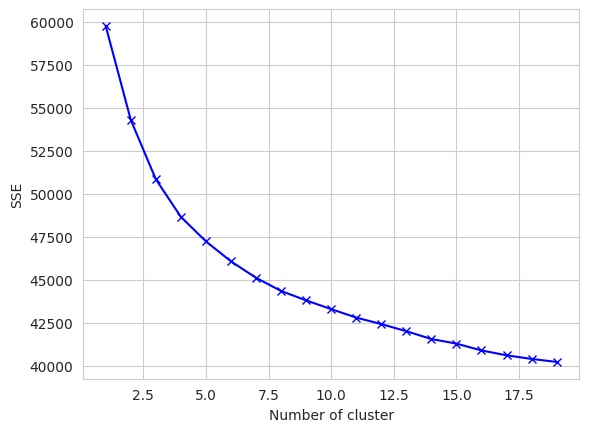

In [223]:
# Sample the data
df_sample = df_prepared.sample(n=5000, random_state=7)

# Empty dictionary to store the SSE for each value of K
sse = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm.
# Use inertia attribute from the clustering object and store the inertia value for that K
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_sample)

    sse[k] = kmeans.inertia_

# Elbow plot
plt.figure()

plt.plot(list(sse.keys()), list(sse.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("SSE")

plt.show()

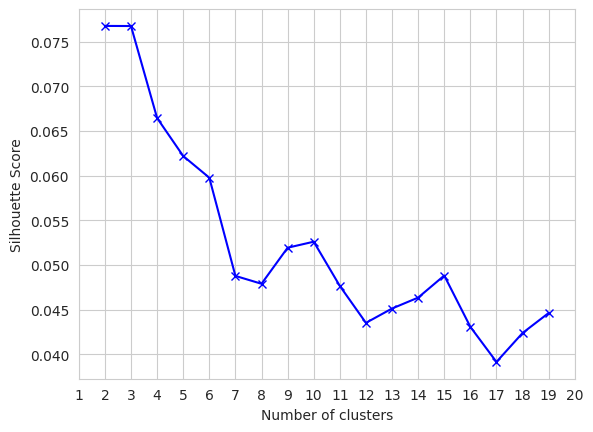

In [224]:
# Sample the data
df_sample = df_prepared.sample(n=5000, random_state=7)

# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 20):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=1, batch_size=1000).fit(df_sample)

    labels = minibatch_kmeans.predict(df_sample)

    sc[k] = silhouette_score(df_sample, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xticks(range(1, 21))

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.show()

I will try first with 8 Clusters

In [225]:
'''
This code takes too long to run.

# Empty dictionary to store the Silhouette score for each value of K
sc = {}

# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_prepared)

    labels = kmeans.predict(df_prepared)

    sc[k] = silhouette_score(df_prepared, labels)

# Elbow plot
plt.figure()

plt.plot(list(sc.keys()), list(sc.values()), 'bx-')

plt.xlabel("Number of cluster")

plt.ylabel("Silhouette Score")

plt.show()'''

'\nThis code takes too long to run.\n\n# Empty dictionary to store the Silhouette score for each value of K\nsc = {} \n\n# Iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that K \nfor k in range(2, 10):\n    kmeans = KMeans(n_clusters = k, random_state = 1).fit(df_prepared)\n    \n    labels = kmeans.predict(df_prepared)\n    \n    sc[k] = silhouette_score(df_prepared, labels)\n\n# Elbow plot\nplt.figure()\n\nplt.plot(list(sc.keys()), list(sc.values()), \'bx-\')\n\nplt.xlabel("Number of cluster")\n\nplt.ylabel("Silhouette Score")\n\nplt.show()'

In [233]:
df_k = df.copy(deep=True)

In [227]:
kmeans = KMeans(n_clusters = 8, random_state = 7)

kmeans.fit(df_prepared)

# Adding predicted labels to the original data and the scaled data
df_prepared_copy['KMeans_Labels'] = kmeans.predict(df_prepared)

df_k['KMeans_Labels'] = kmeans.predict(df_prepared)

In [286]:
# Adding predicted labels to the original data and the scaled data
df_prepared_copy['KMeans_Labels'] = kmeans.predict(df_prepared)

df_k['KMeans_Labels'] = kmeans.predict(df_prepared)

In [287]:
df_k['KMeans_Labels'] = df_k['KMeans_Labels'].apply(lambda x: x + 1)

In [288]:
df_k['KMeans_Labels'].value_counts(normalize=True)

KMeans_Labels
1   0.16
3   0.15
5   0.13
2   0.12
6   0.12
4   0.11
8   0.11
7   0.10
Name: proportion, dtype: float64

In [236]:
cluster_kmeans = df_prepared_copy.groupby('KMeans_Labels')


In [240]:
df_k['Product_Type'] = df_k.Product_Type.replace({'Mitsubishi 1.5 Ton 3 Star Split AC':'Mit. 1.5 Ton Split AC'})

In [241]:
# Function to plot Product Brand and Type by Month
def brand_type_by_k(k):
  filtered_df = df_k[df_k['KMeans_Labels'].isin([k])]

  cat_cols2 = ['Product_Type']

  for col in cat_cols2:
      # Get the top 10 most frequent values from the filtered DataFrame
      top_10_values = filtered_df[col].value_counts().nlargest(10).index
      top_10_df = filtered_df[filtered_df[col].isin(top_10_values)]

      plt.figure(figsize=(12,6))
      ax = sns.countplot(data=top_10_df, x=col, width=0.6, order=top_10_df[col].value_counts().index)
      plt.xticks(rotation=45)

      # Calculate percentages
      total = len(top_10_df[col])
      max_height = max([p.get_height() for p in ax.patches])
      ax.set_ylim(0, max_height * 1.1)  # Increase y-axis limit by 10%

      for p in ax.patches:
          percentage = f'{100 * p.get_height() / total:.1f}%'
          x = p.get_x() + p.get_width() / 2
          y = p.get_height()
          ax.annotate(percentage, (x, y), ha='center', va='bottom')
      plt.title(f'{col.replace("_", " ")} Distribution By {k}')
      plt.xlabel('')
      plt.tight_layout()
      plt.show()

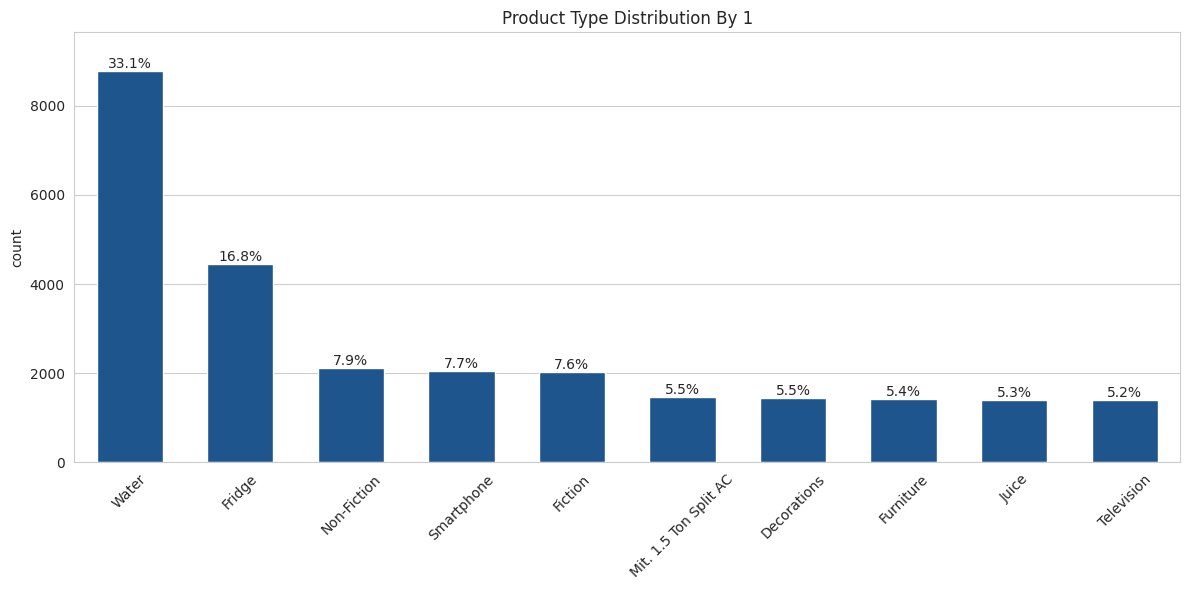

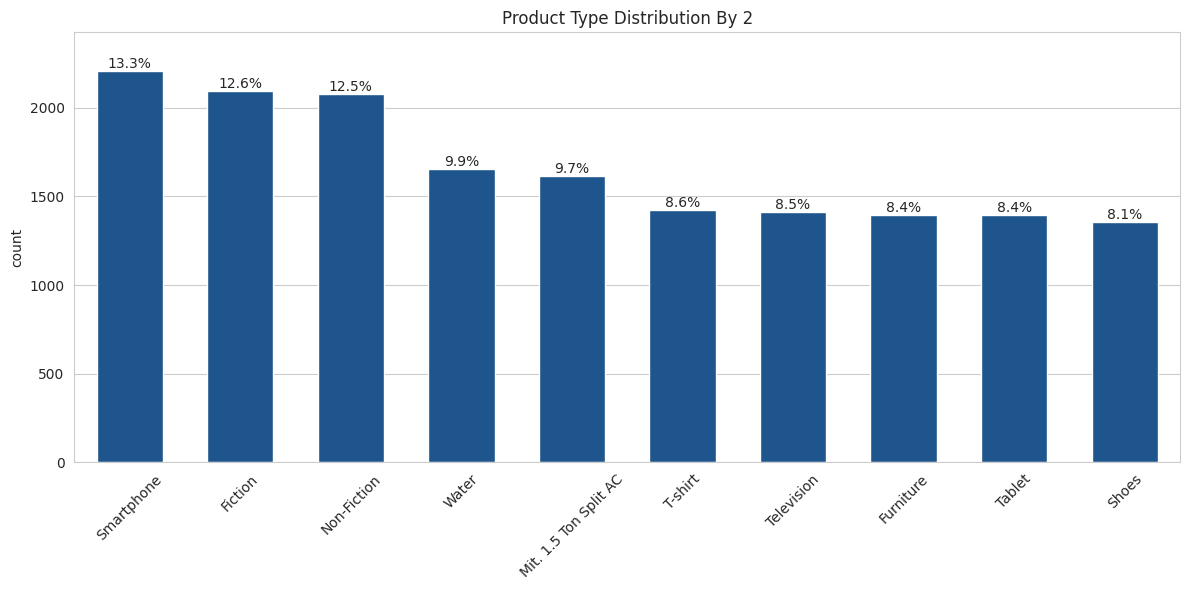

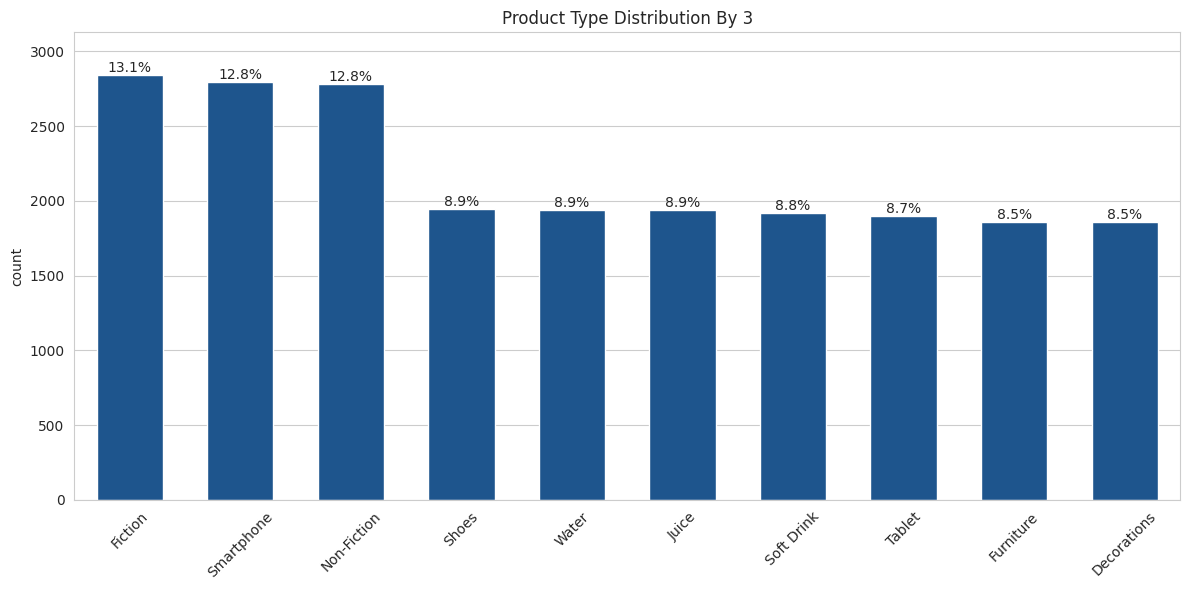

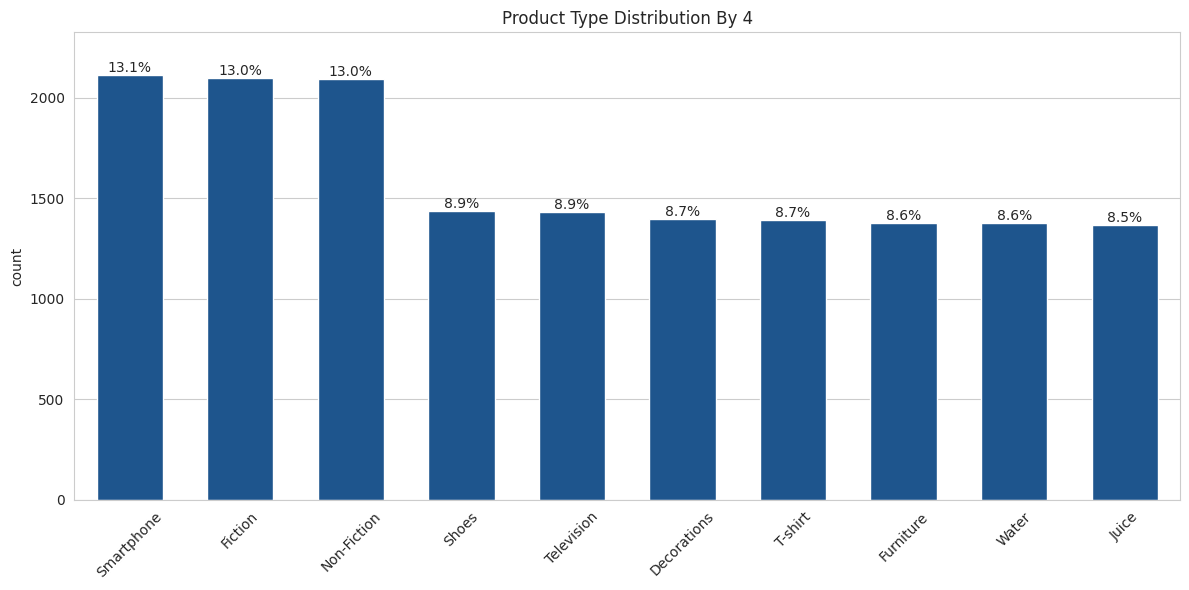

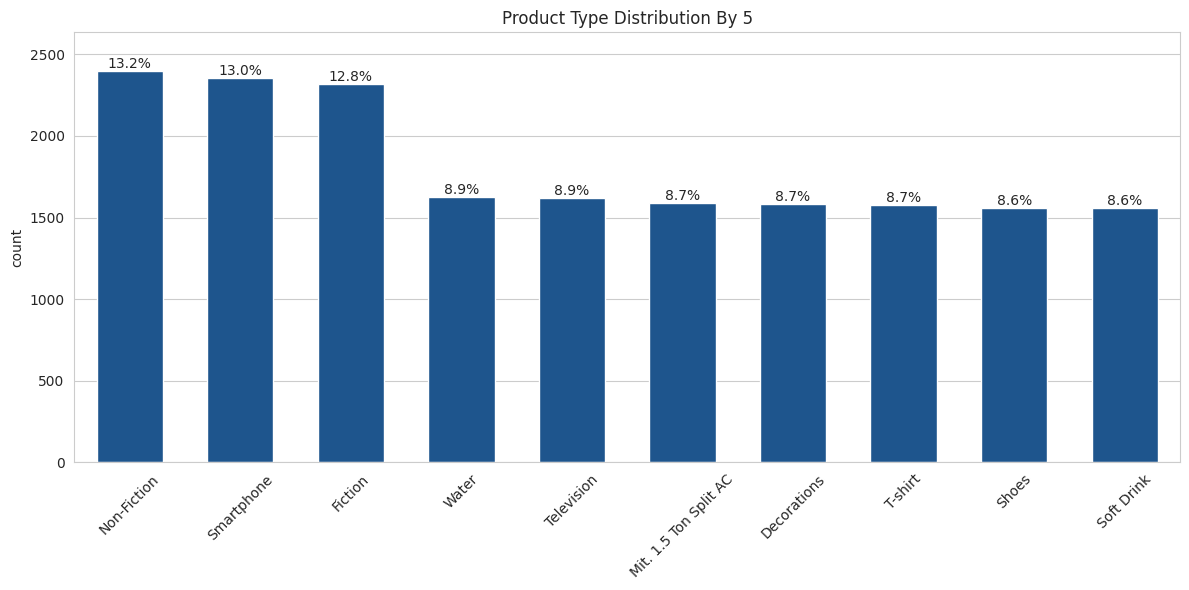

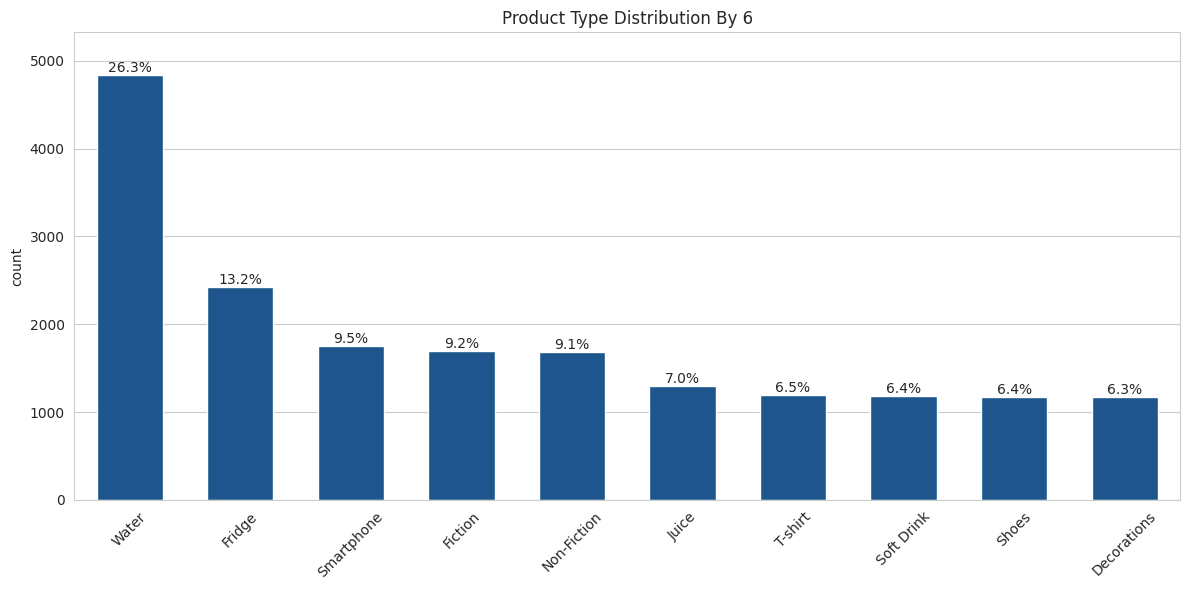

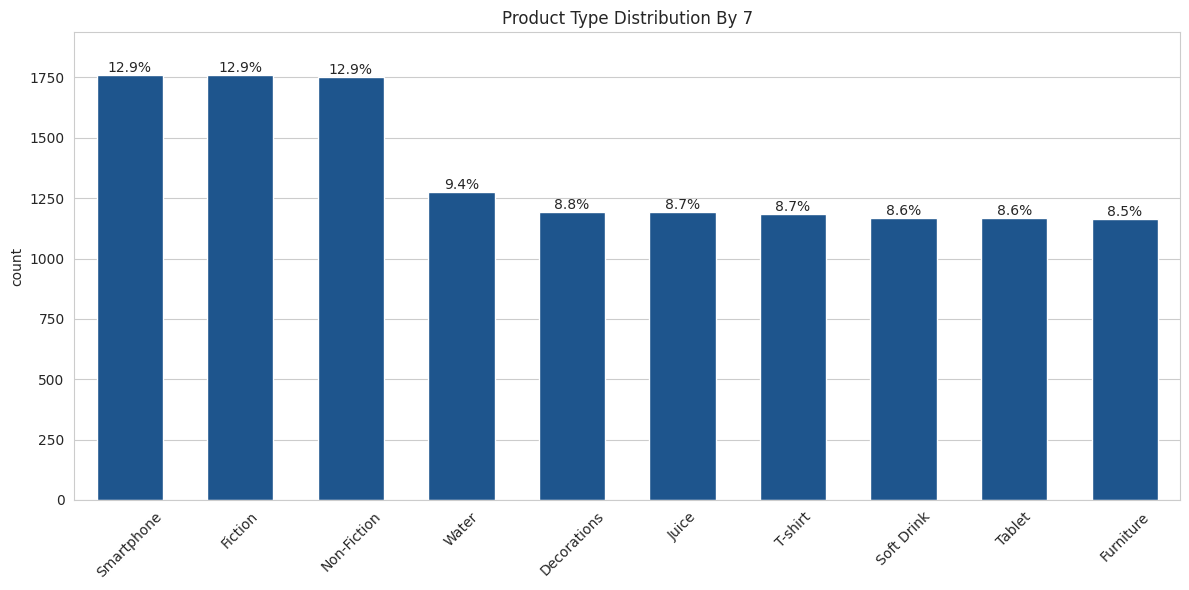

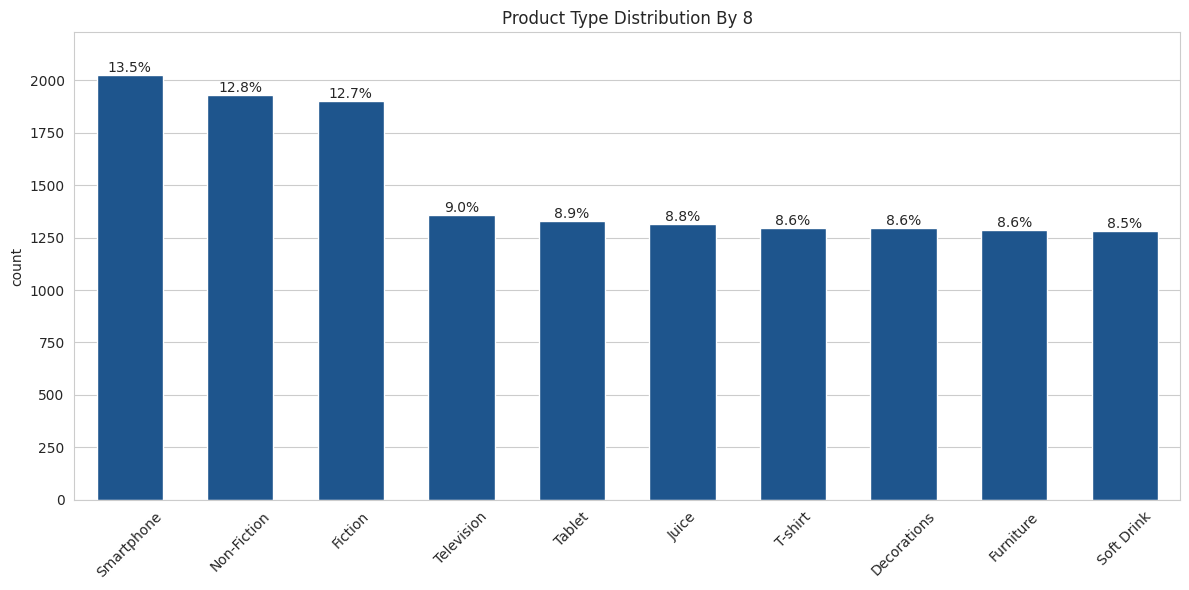

In [289]:
for i in range(1,9):
  brand_type_by_k(i)
  plt.show()

In [139]:
def kde_by_k(k,col):
  filtered_df = df_k[df_k['KMeans_Labels'].isin([k])]
  sns.kdeplot(data=filtered_df, x=col, fill=True)

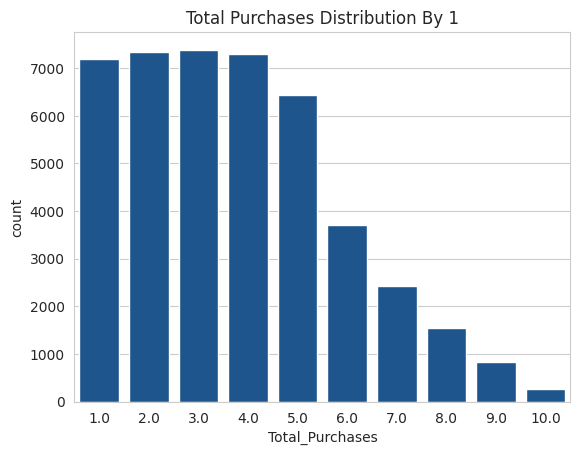

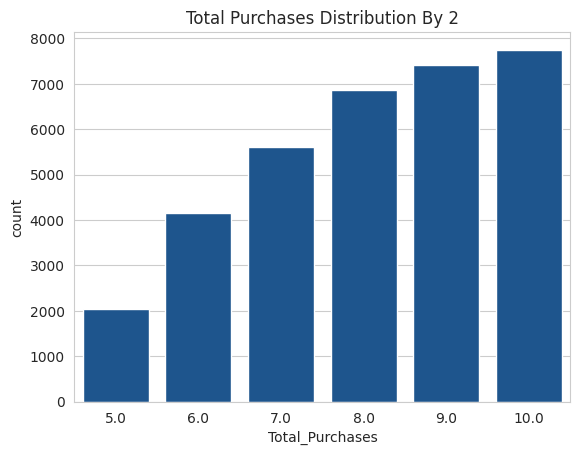

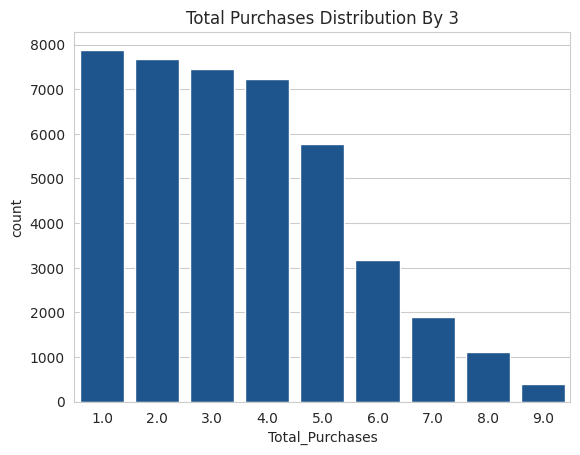

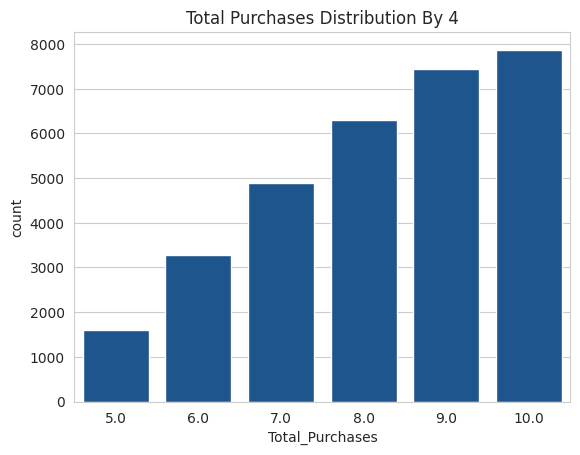

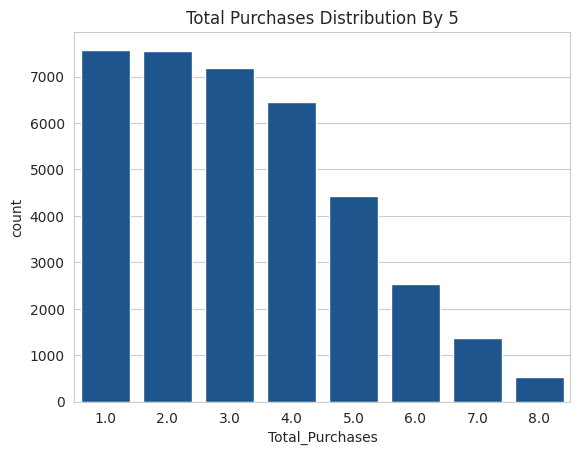

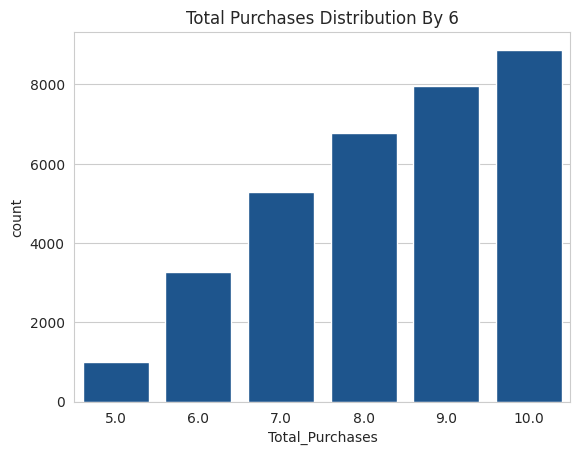

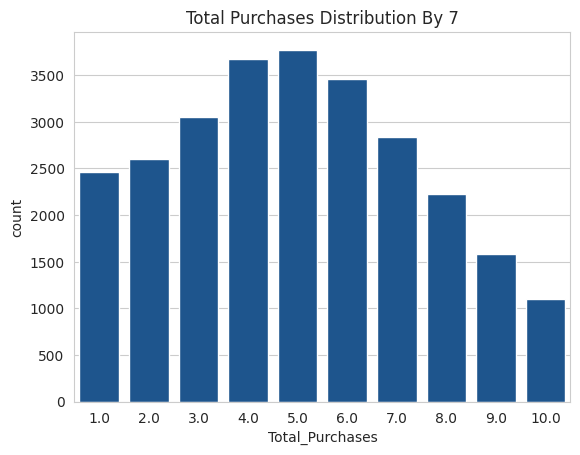

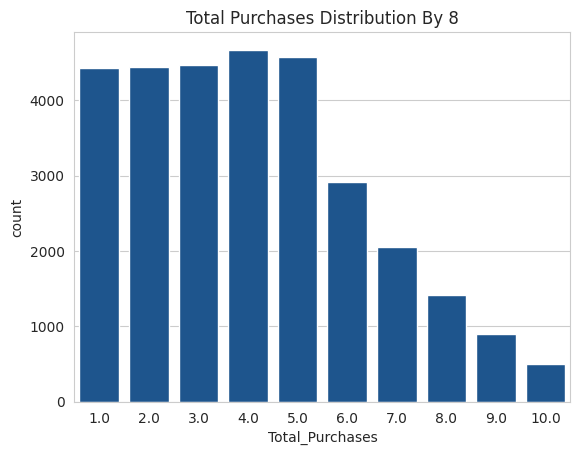

In [295]:
for i in range(1,9):
  kde_by_k(i,'Total_Purchases')
  plt.title(f'Total Purchases Distribution By {i}')
 # plt.xticks(np.arange(1, 12))  # Set x-axis ticks from 1 to 10
 # plt.xlim(1, 11)  # Set x-axis limits from 1 to 10
  plt.show()

In [157]:
def rating_by_k(k,col):
  filtered_df = df_k[df_k['KMeans_Labels'].isin([k])]
  sns.countplot(data=filtered_df, x=col, fill=True)

In [153]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_ID,280216.00,5492585.59,2595884.95,1000007.00,3243752.75,5493928.00,7735630.25,9999995.00
Customer_ID,280216.00,55003.16,26007.58,10000.00,32472.00,55004.50,77499.00,99999.00
Age,280216.00,35.40,15.00,18.00,22.00,32.00,46.00,70.00
Year,280216.00,2023.16,0.37,2023.00,2023.00,2023.00,2023.00,2024.00
Total_Purchases,280216.00,5.36,2.87,1.00,3.00,5.00,8.00,10.00
Amount,280216.00,255.17,141.43,10.00,132.81,255.39,377.72,500.00
Total_Amount,280216.00,1368.63,1129.02,10.00,439.43,1042.33,2031.20,4999.63
Ratings,280216.00,3.17,1.32,1.00,2.00,3.00,4.00,5.00


In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

def analysis_by_k(k):
    # Filter the dataframe for the selected cluster
    filtered_df = df_k[df_k['KMeans_Labels'] == k]
    cluster_per = int(filtered_df.shape[0] / df_k.shape[0] * 100)

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    fig.suptitle(f'Analysis of Cluster {k} Represents {cluster_per}%')

    # Countplot for Ratings
    ratings_counts = filtered_df['Ratings'].value_counts().sort_index()
    axes[0, 0].bar(ratings_counts.index, ratings_counts.values)
    axes[0, 0].set_title(f'Cluster {k}: Ratings Countplot')
    axes[0, 0].set_xlim(0.5, 5.5)
    axes[0, 0].set_xticks(range(1, 6))
    axes[0, 0].set_xlabel('Ratings')
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_ylim(10, 30000)

    # Countplot for top 10 Product_Type
    top_product_types = filtered_df['Product_Type'].value_counts().head(10).index
    sns.countplot(data=filtered_df[filtered_df['Product_Type'].isin(top_product_types)],
                  x='Product_Type', ax=axes[0, 1], order=top_product_types)
    axes[0, 1].set_title(f'Cluster {k}: Top 10 Product Types', fontsize=14)
    axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)
    axes[0, 1].tick_params(axis='y', labelsize=10)
    axes[0, 1].set_ylim(0, 9500)

      # Adding percentages on top of bars
    product_counts = filtered_df['Product_Type'].value_counts().head(10)
    total_counts = product_counts.sum()
    for i, count in enumerate(product_counts):
        percentage = f'{(count / total_counts) * 100:.1f}%'
        axes[0, 1].text(i, count, percentage, ha='center', va='bottom', fontsize=10)


    # KDE plot for Age
    sns.kdeplot(data=filtered_df, x='Age', ax=axes[1, 0], fill=True)
    axes[1, 0].set_title(f'Cluster {k}: Age Distribution')
    axes[1, 0].set_xlim(15, 70)
    axes[1, 0].set_ylim(0, 0.18)

    # Histplot for Total_Amount
    sns.histplot(data=filtered_df, x='Total_Amount', ax=axes[1, 1], bins=20)
    axes[1, 1].set_title(f'Cluster {k}: Total Amount Distribution')
    axes[1, 1].set_xlim(10, 5000)
    axes[1, 1].set_ylim(0, 5000)


    # Adjust layout
    plt.tight_layout()



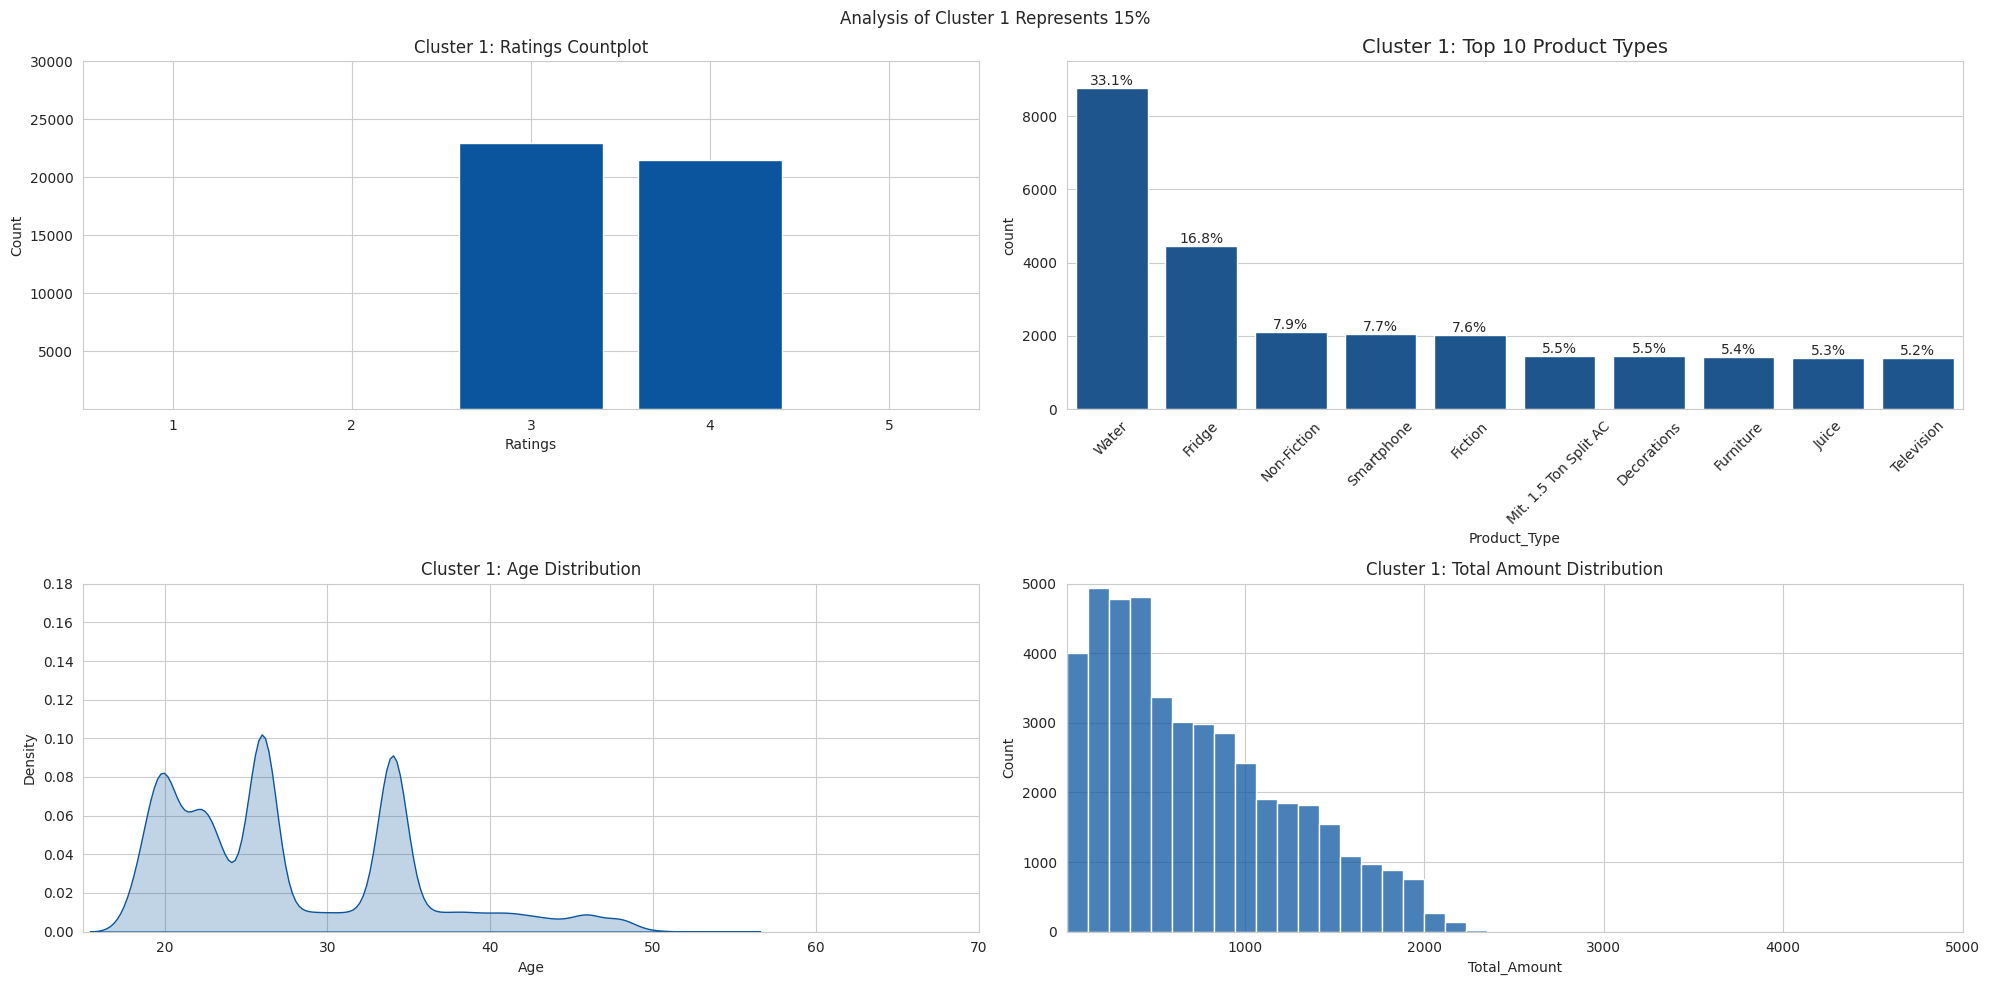

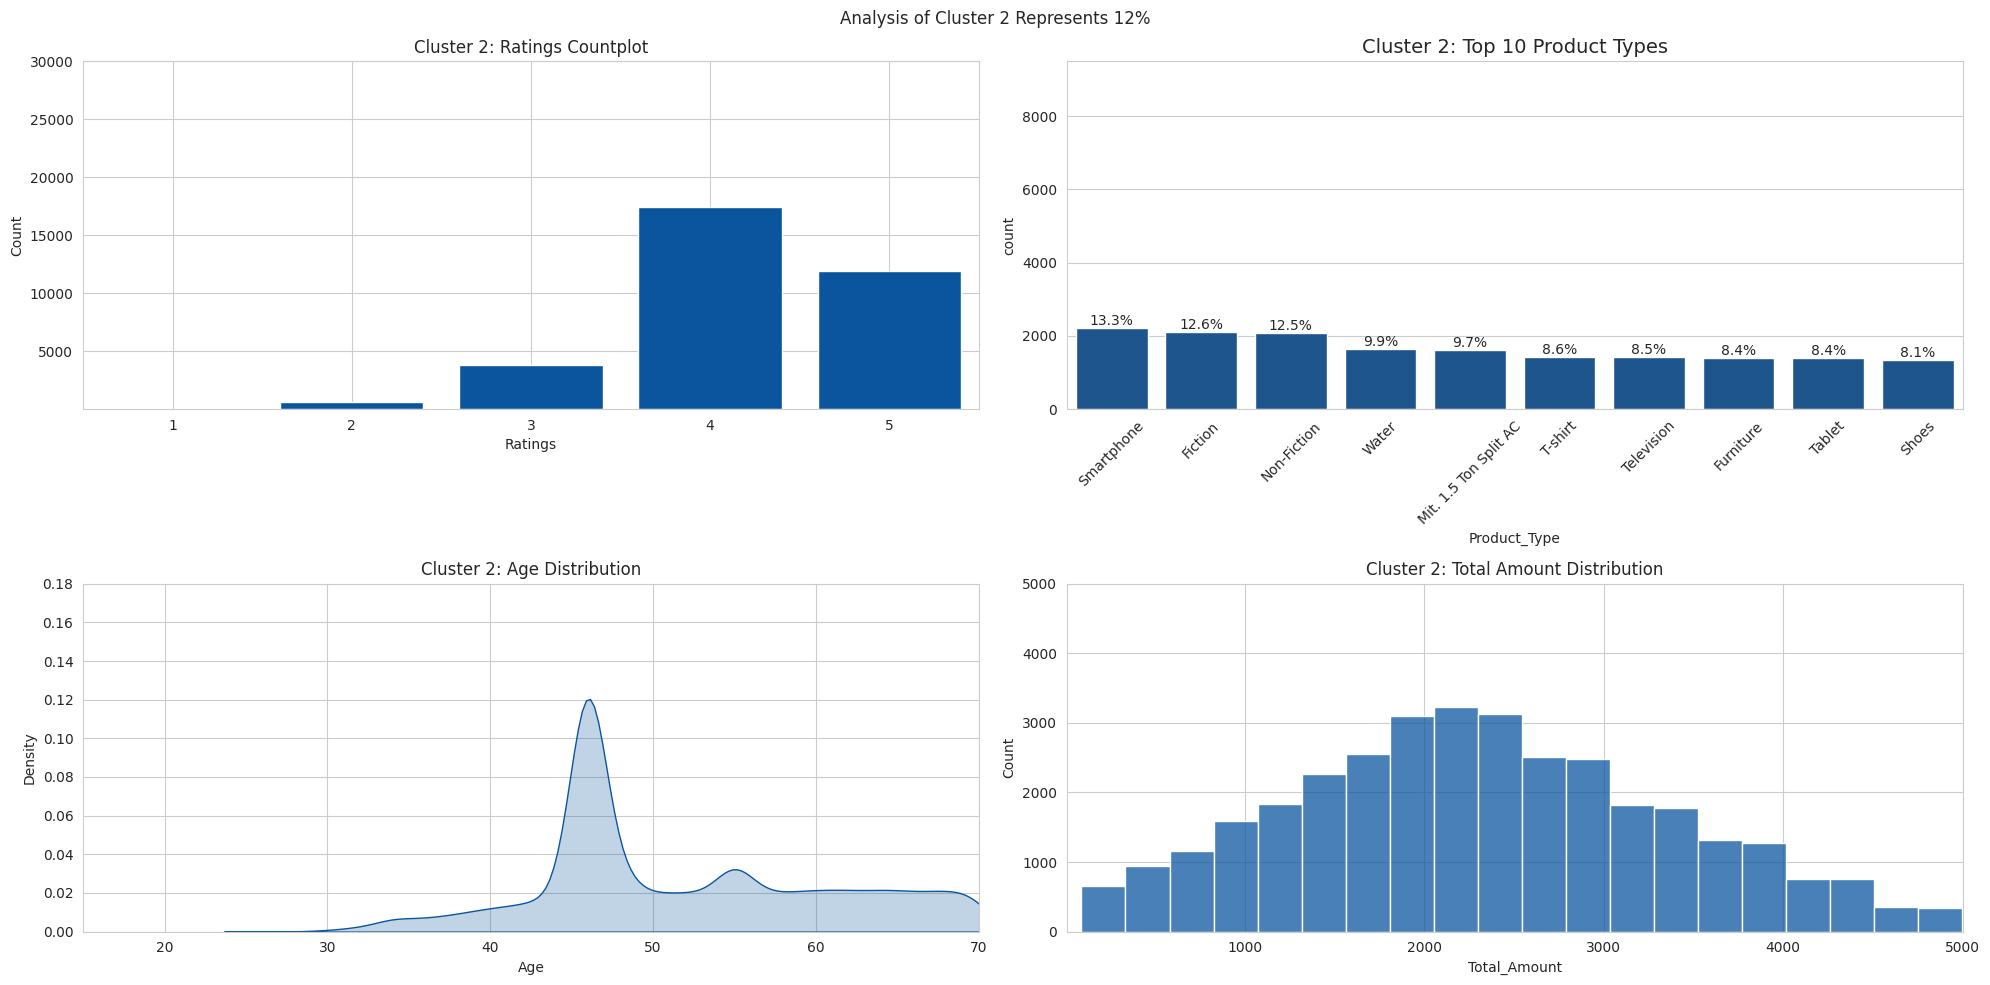

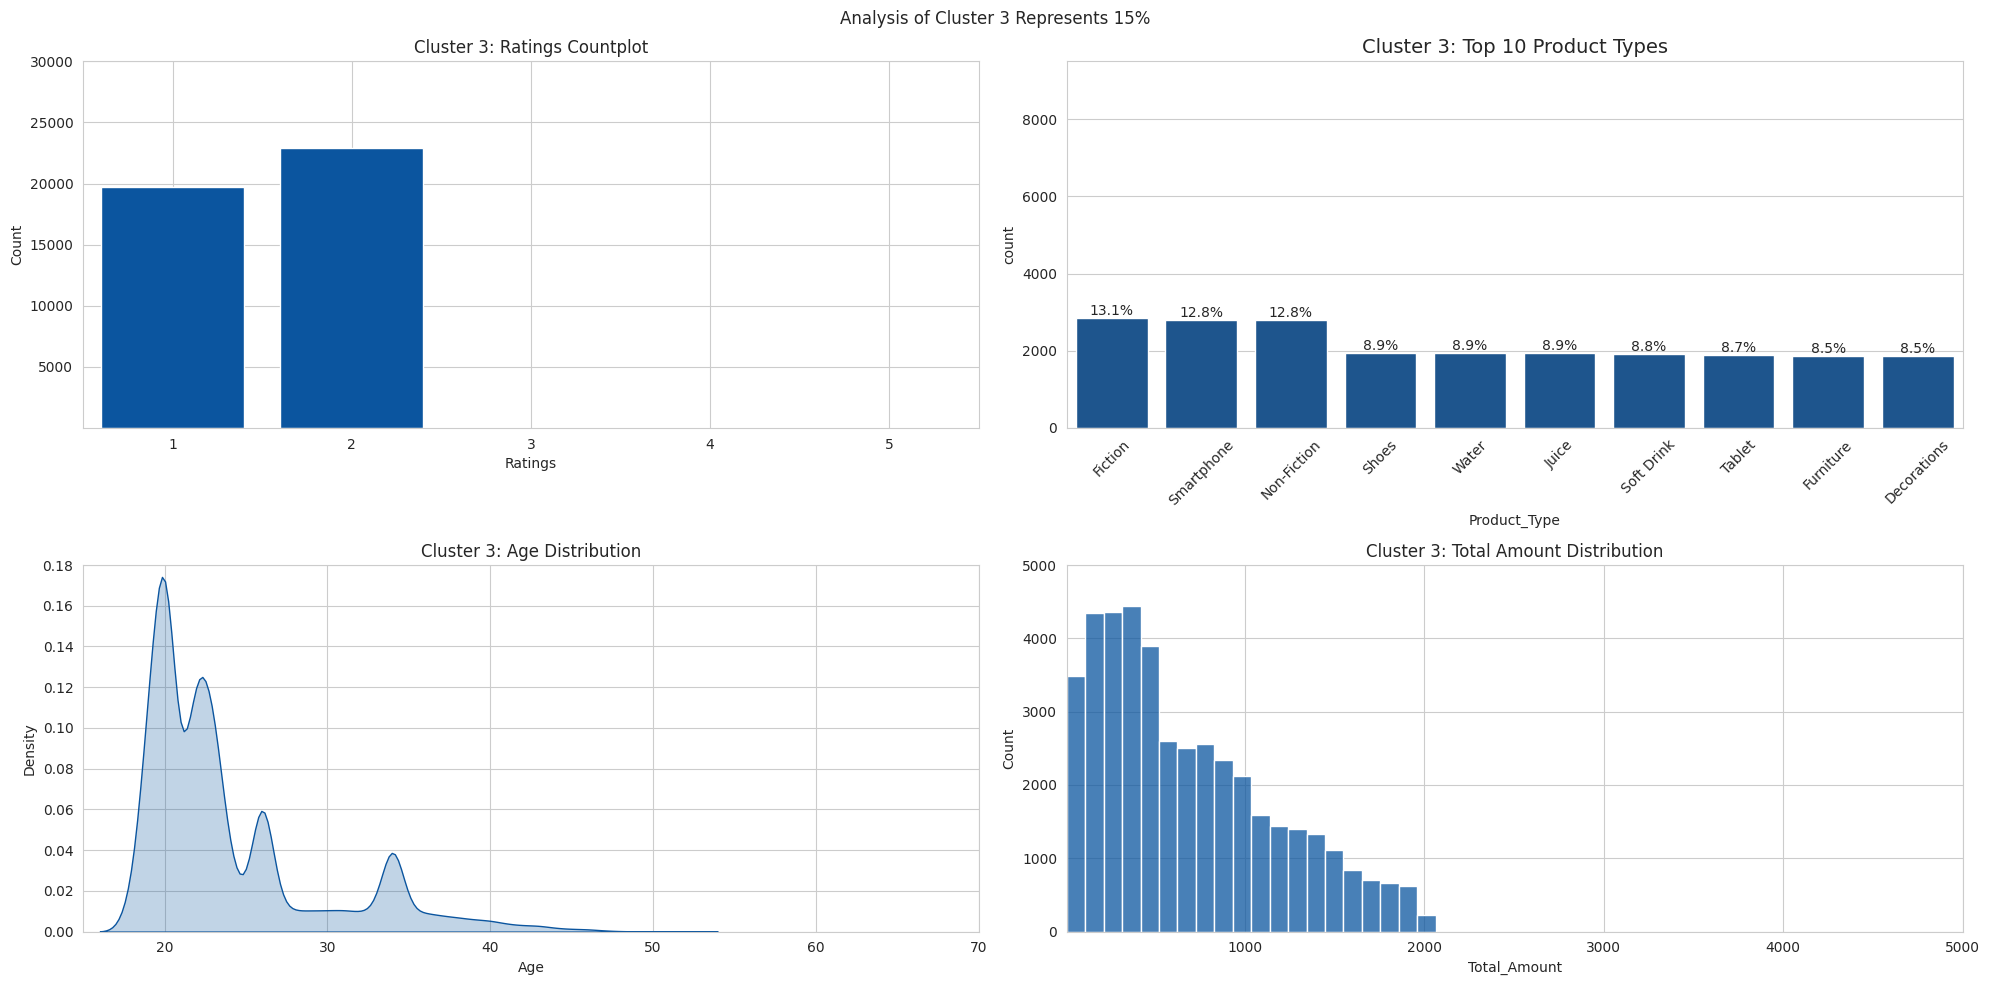

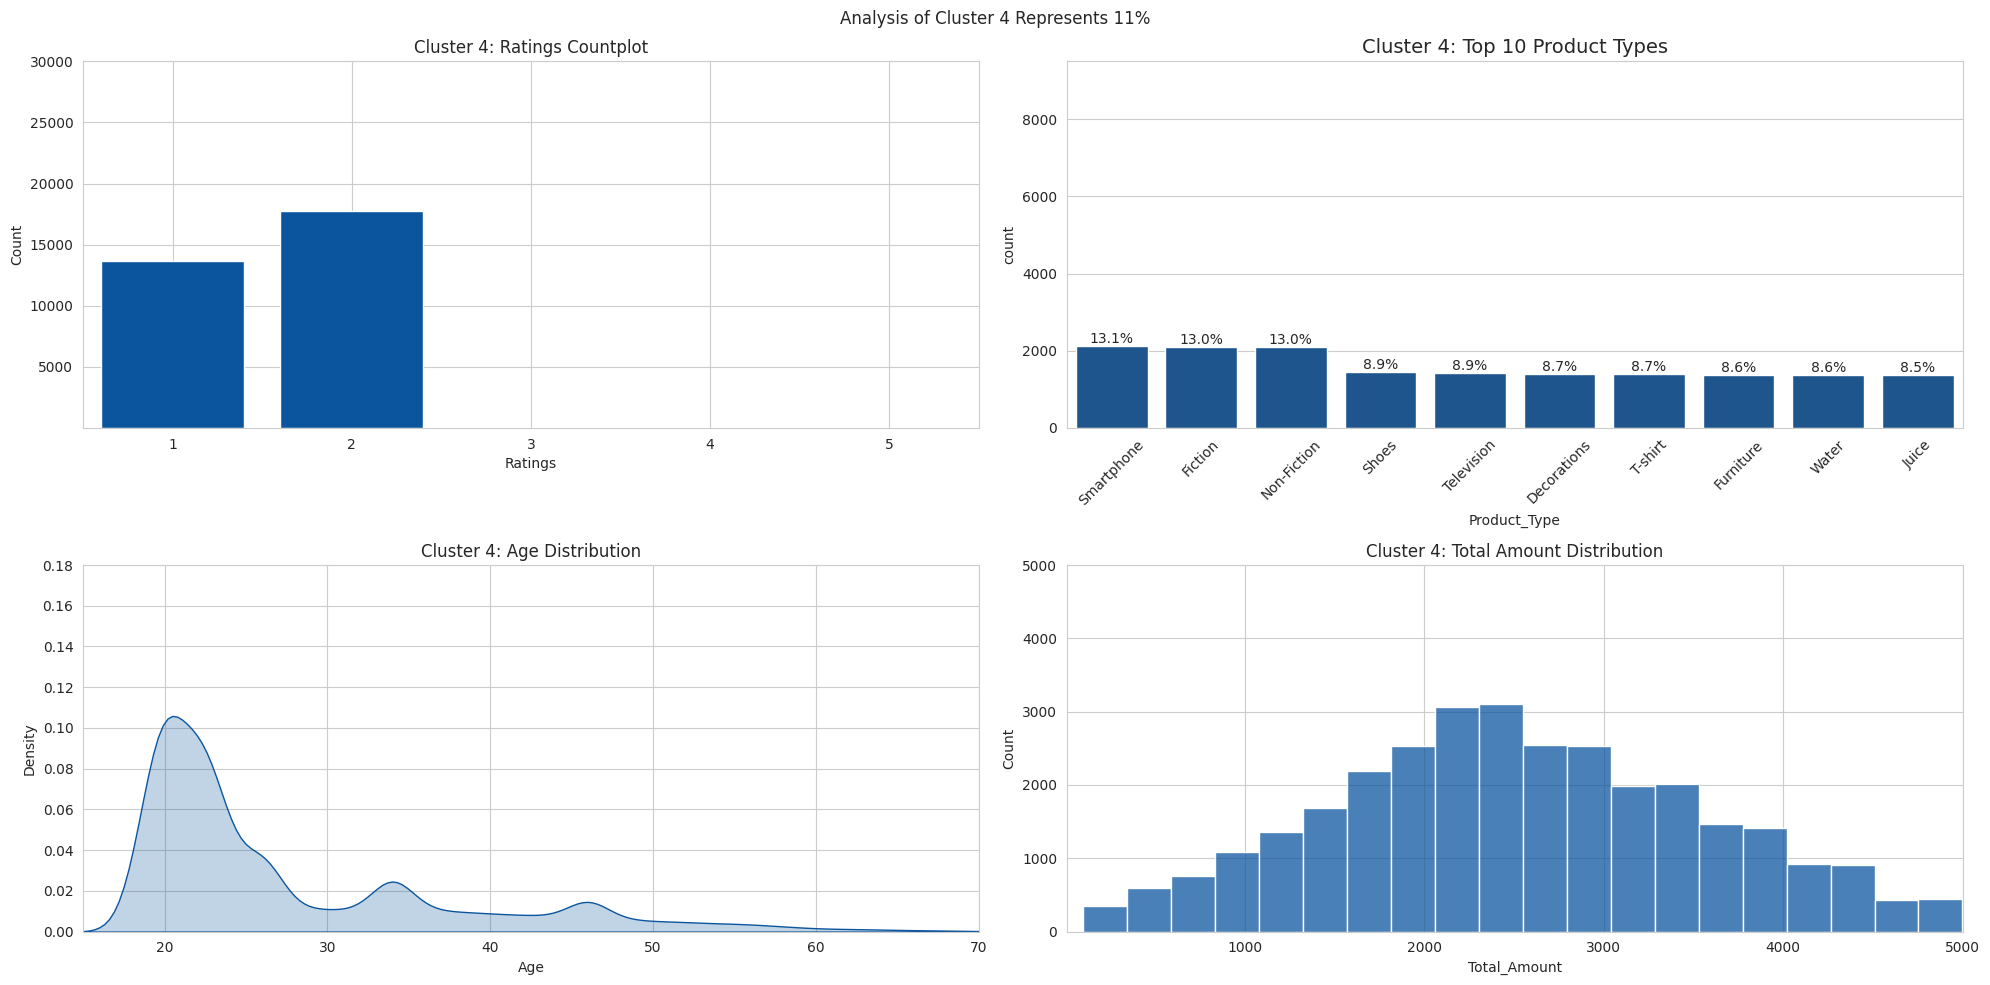

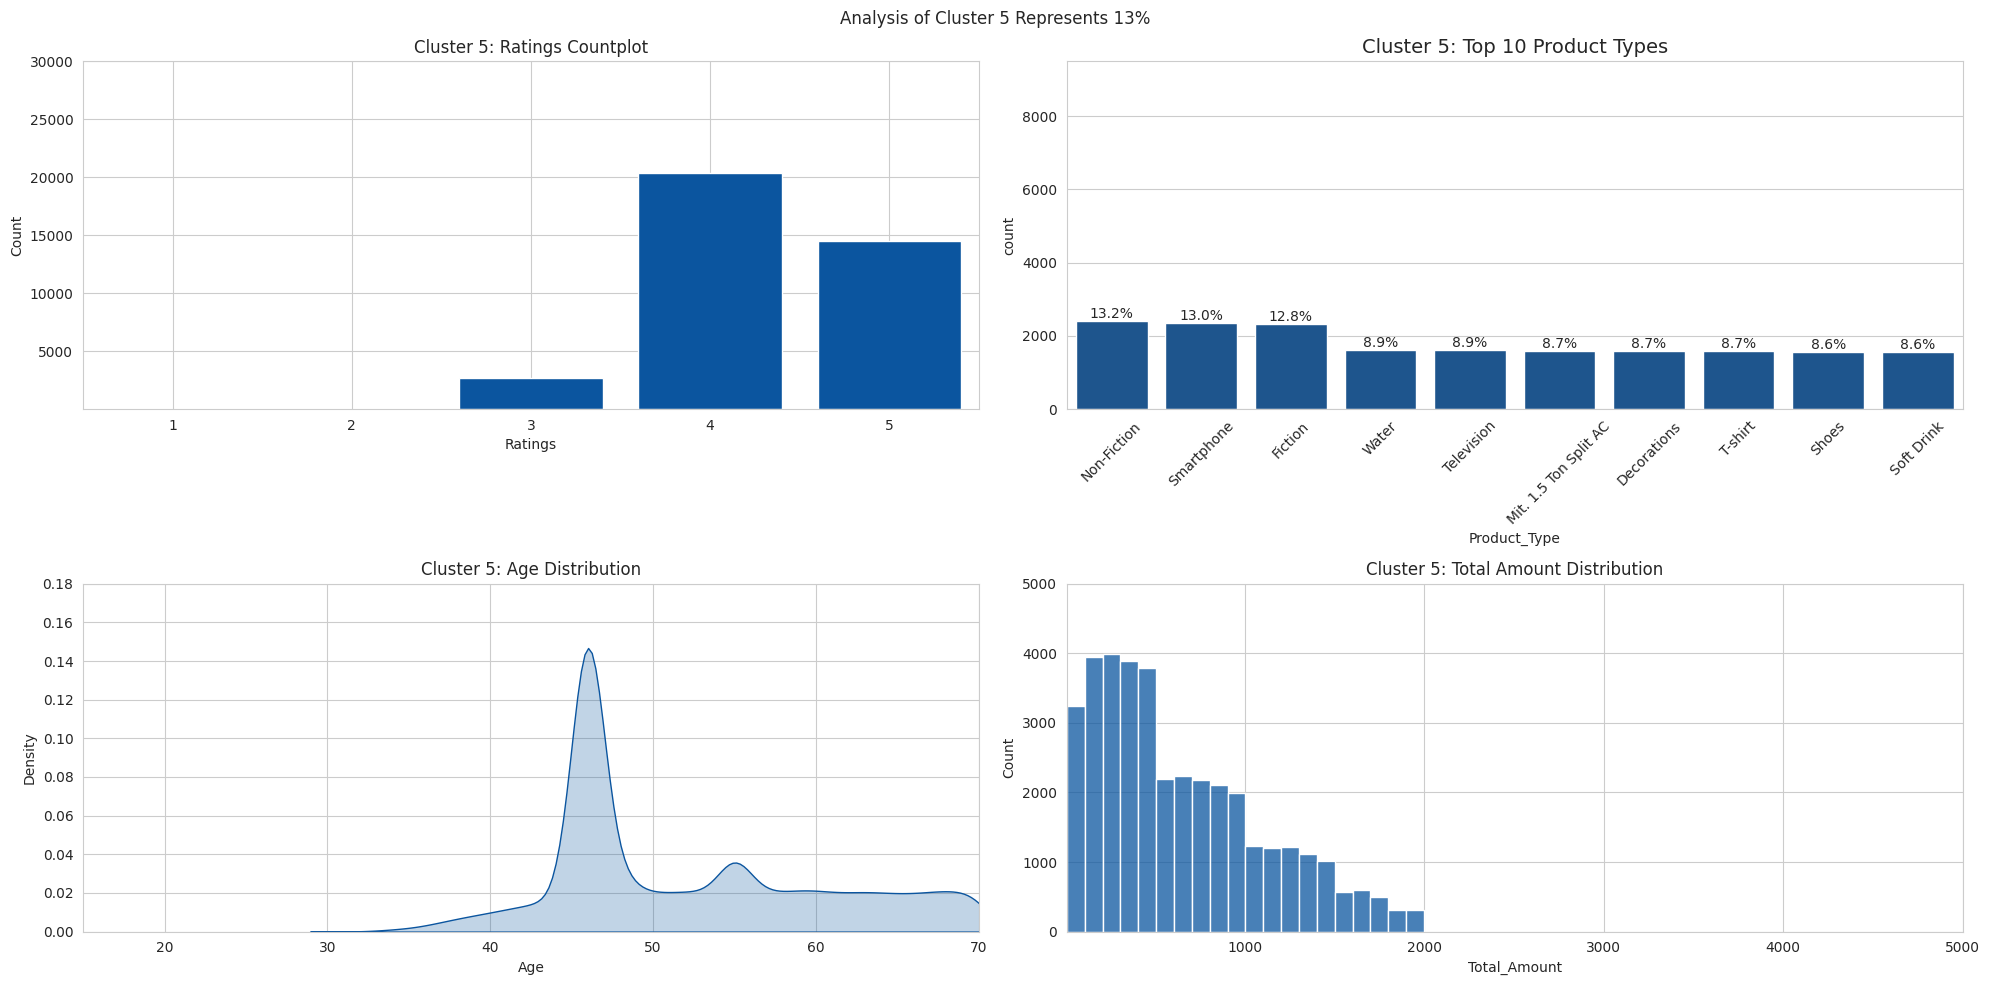

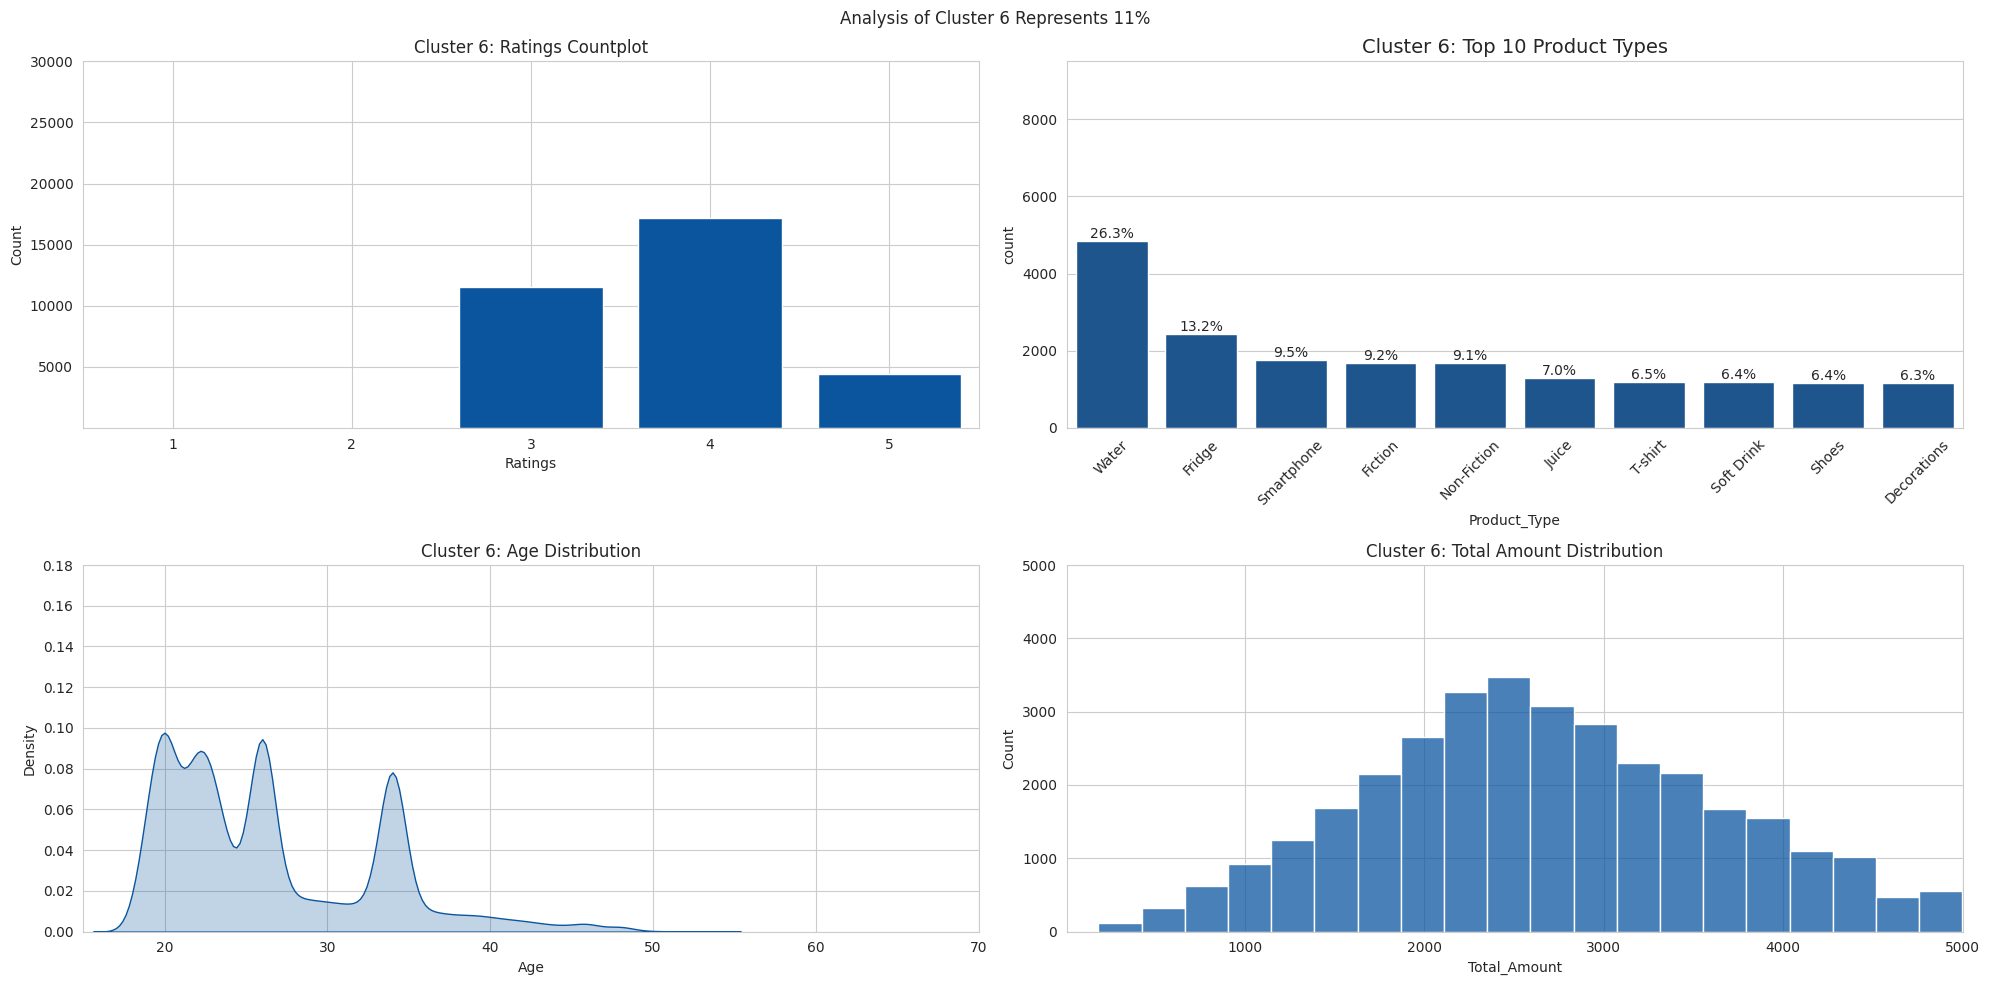

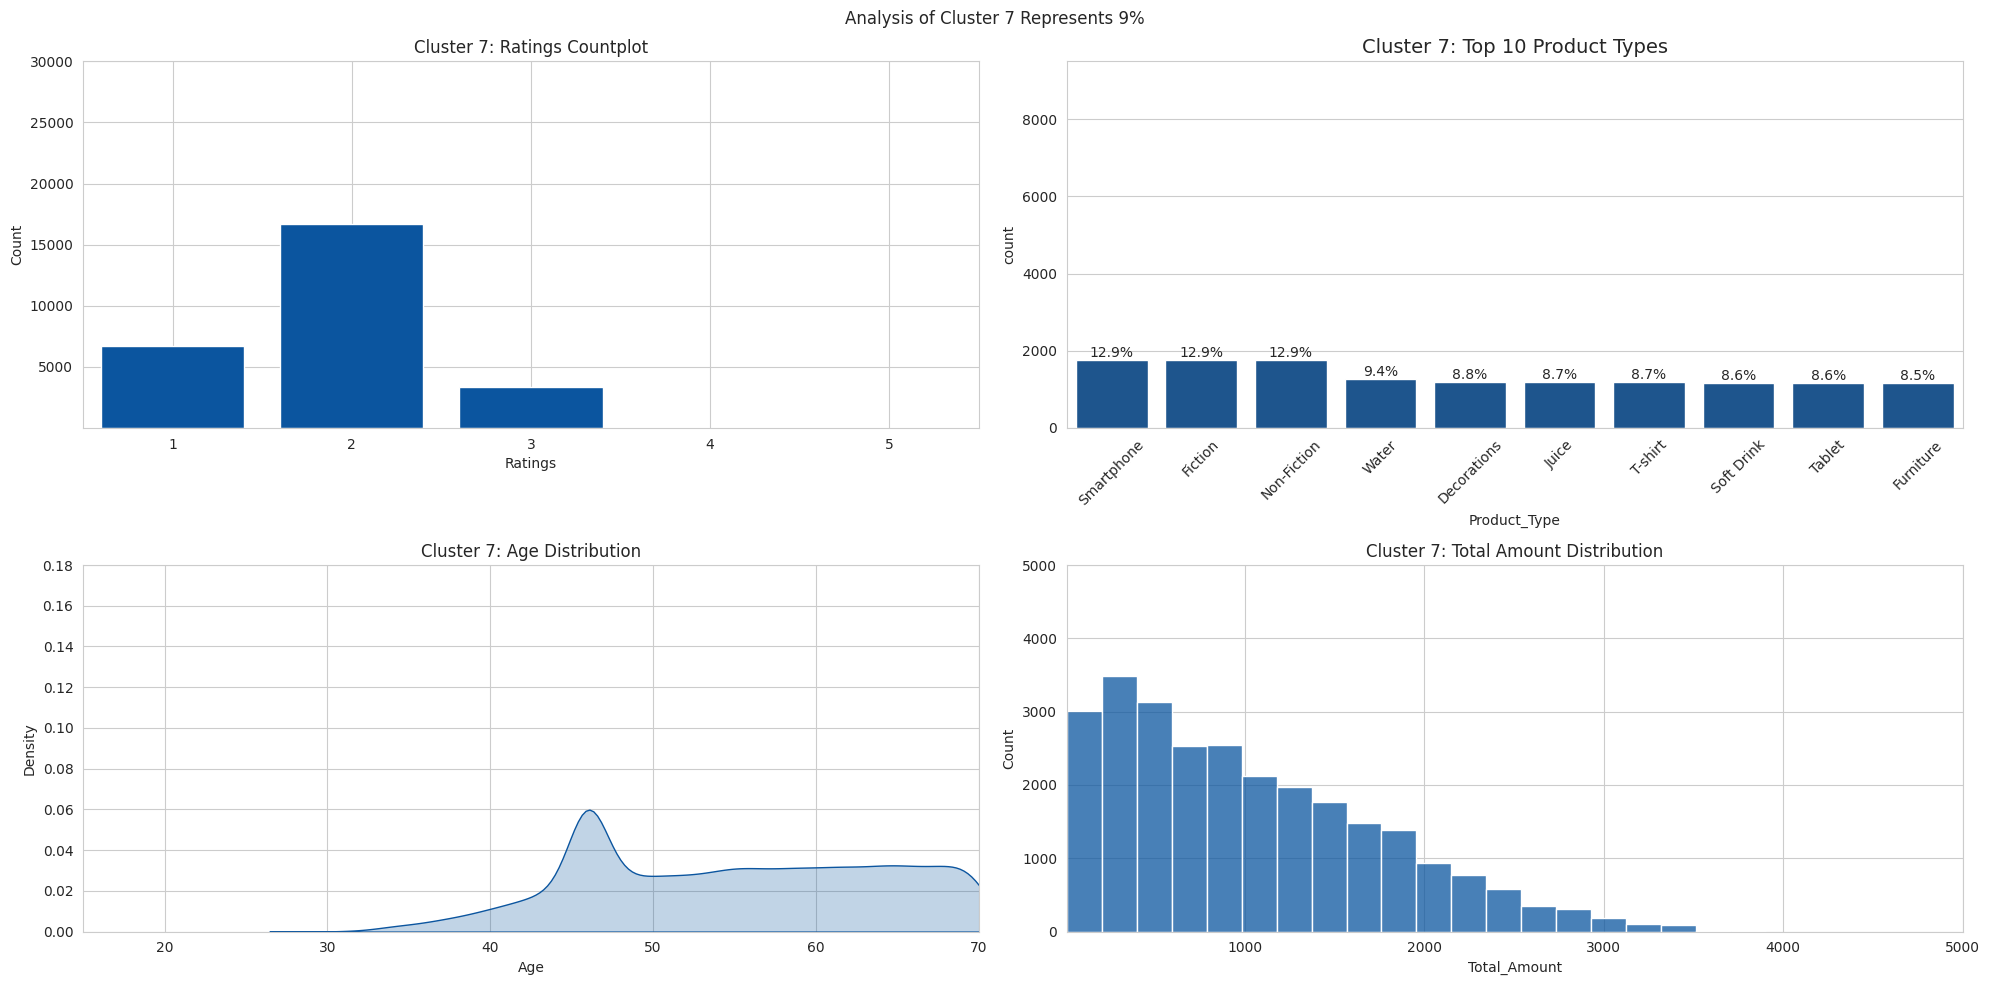

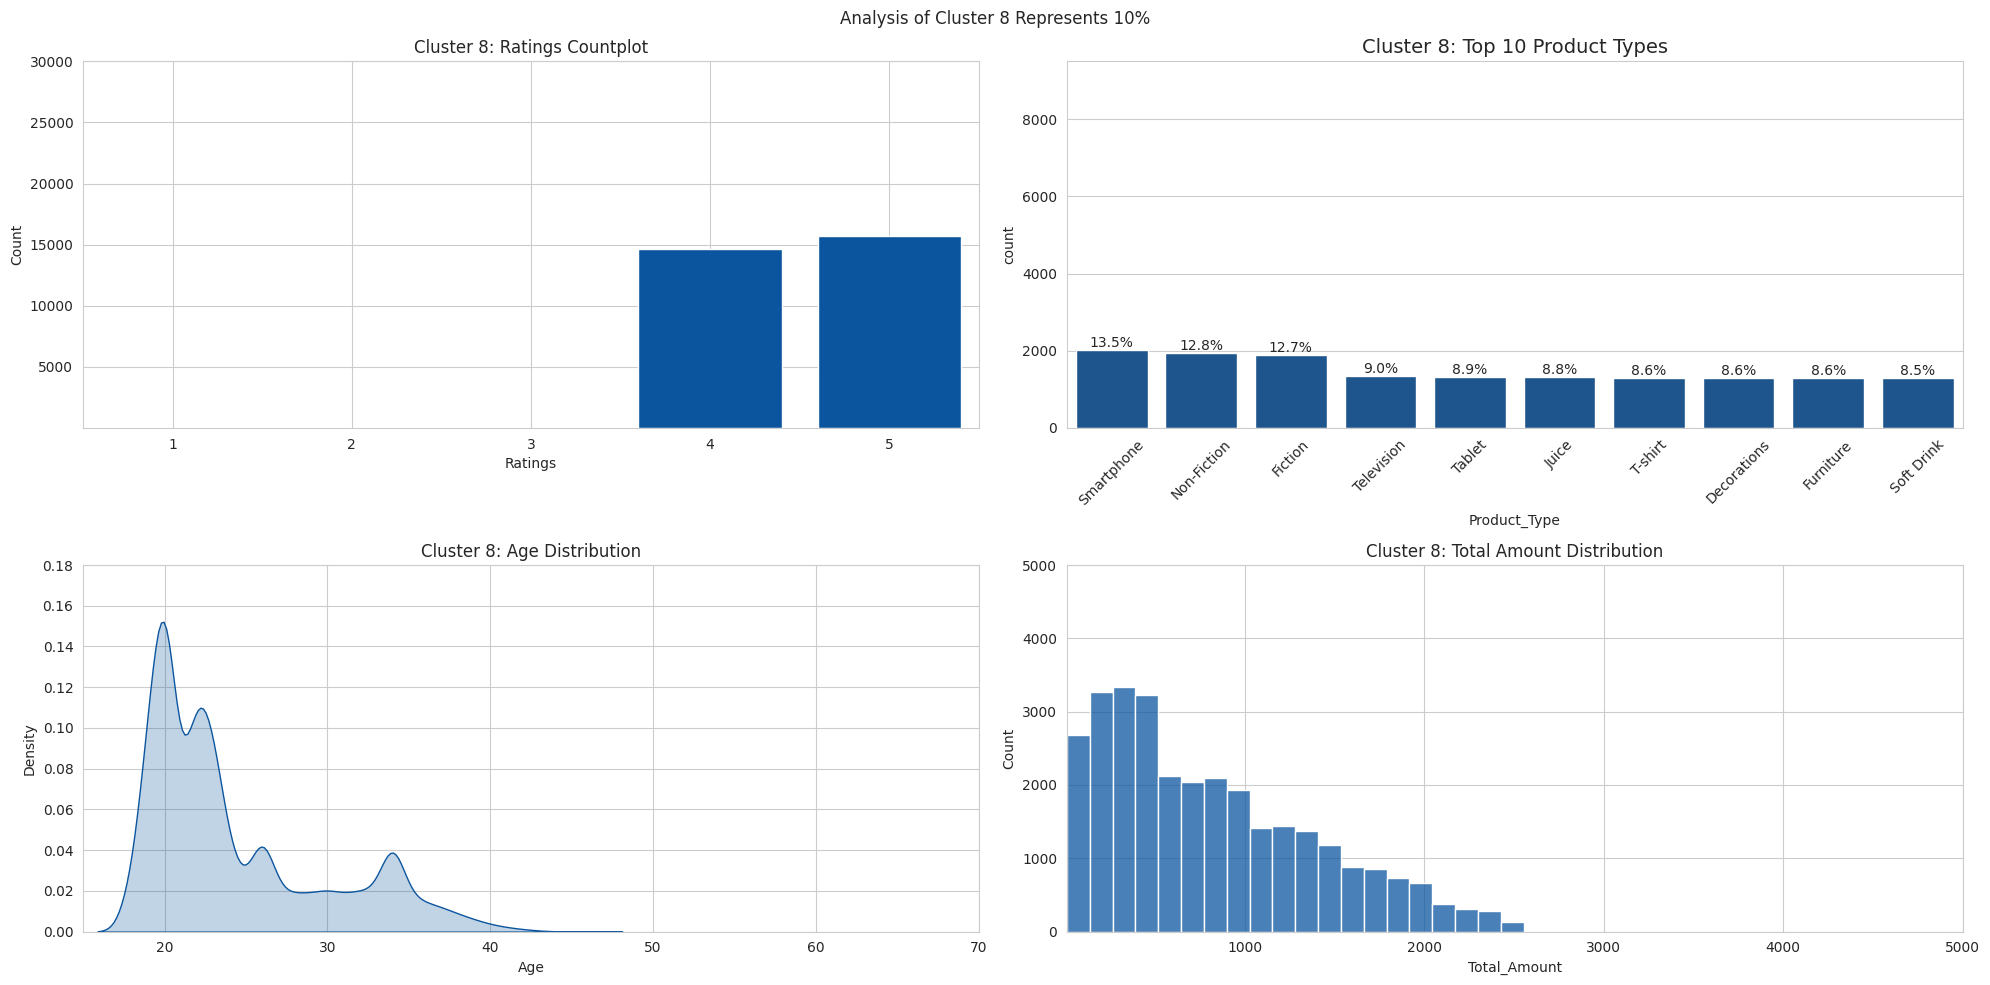

In [347]:
for i in range(1,9):
  analysis_by_k(i)
  plt.show()